<a href="https://colab.research.google.com/github/2003UJAN/2003UJAN/blob/main/Coast_Erosion_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#installing shap module
!pip install pandas numpy shap scikit-learn matplotlib

In [29]:
#installing lime module
!pip install lime

In [30]:
#importing necessary libraries
import pandas as pd
import numpy as np
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#loading dataset
df = pd.read_csv('Land Submergence dataset.csv')

In [32]:
# Check for missing values and handle them if necessary
df = df.dropna()

In [33]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Country', 'Continent'], drop_first=True)

In [34]:
# Define the target and features
X = df.drop(columns=['Temperature'])
y = df['Temperature']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.9982505646744098
Mean Squared Error: 0.13330500365281972


In [38]:
# Feature importance from Random Forest
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [39]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. Feature Continent_Europe (0.5069312341368873)
2. Feature Land area (0.12534363610076282)
3. Feature Coastal length (0.057791890669181105)
4. Feature Land Impact (0.04534581749595456)
5. Feature Country_mongolia (0.028404269085062408)
6. Feature Continent_Asia (0.027613840229044527)
7. Feature Country_north korea (0.022464151667798207)
8. Feature Country_kyrgyzstan (0.018587996424164744)
9. Feature Country_kazakhstan (0.01739398817090111)
10. Feature Country_south korea (0.01263899453342582)
11. Feature Country_tajikistan (0.011769957671000064)
12. Feature Country_new zealand (0.011604332419418379)
13. Feature Country_lesotho (0.009272782541356273)
14. Feature Country_laos (0.009195151743128623)
15. Feature Country_japan (0.008642300381124639)
16. Feature Country_chile (0.0067882792984667924)
17. Feature Country_cyprus (0.0066555896474326005)
18. Feature Country_uruguay (0.00499229161018732)
19. Feature Country_iceland (0.00455208558144177)
20. Feature Country_argent

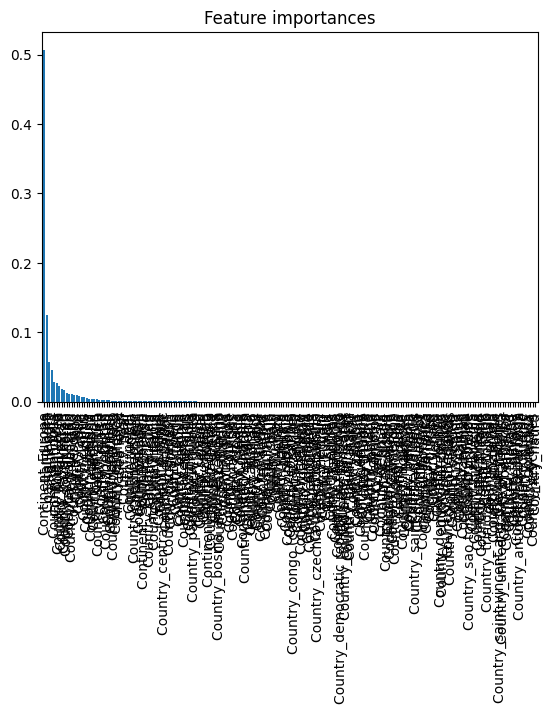

In [40]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [41]:
# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [42]:
# Visualize the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

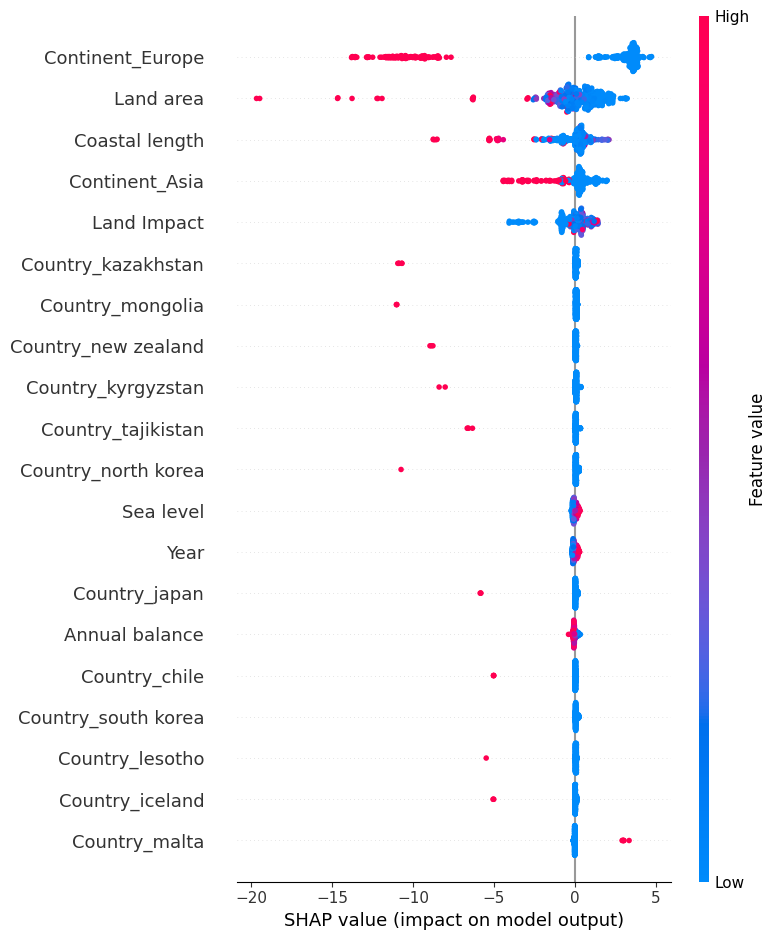

In [43]:
# Summary plot of SHAP values for the whole dataset
shap.summary_plot(shap_values, X_test)

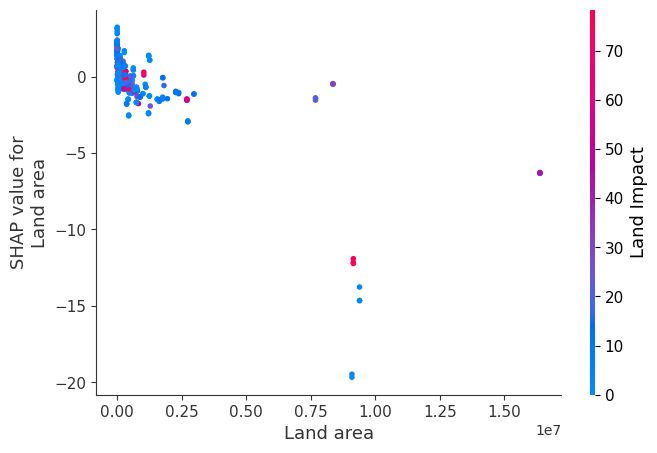

In [44]:
# Dependence plot for a specific feature (e.g., 'Land area')
shap.dependence_plot('Land area', shap_values, X_test)

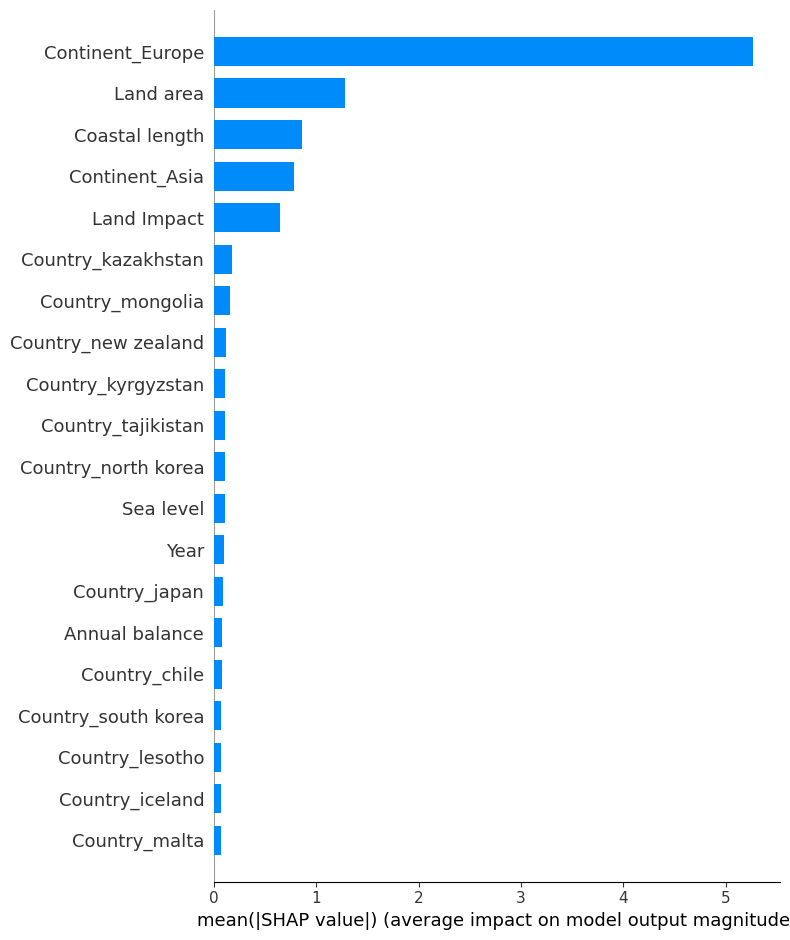

In [45]:
# Additional analysis: Plot feature importance based on SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [46]:
# Use LIME to explain a single prediction
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                        feature_names=X_train.columns,
                                                        class_names=['Temperature'],
                                                        verbose=True, mode='regression')

In [47]:
i = 0
exp = explainer_lime.explain_instance(X_test.values[i], model.predict, num_features=10)
exp.show_in_notebook(show_table=True)

Intercept -23.606220940980265
Prediction_local [8.37356892]
Right: 5.71791881682


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


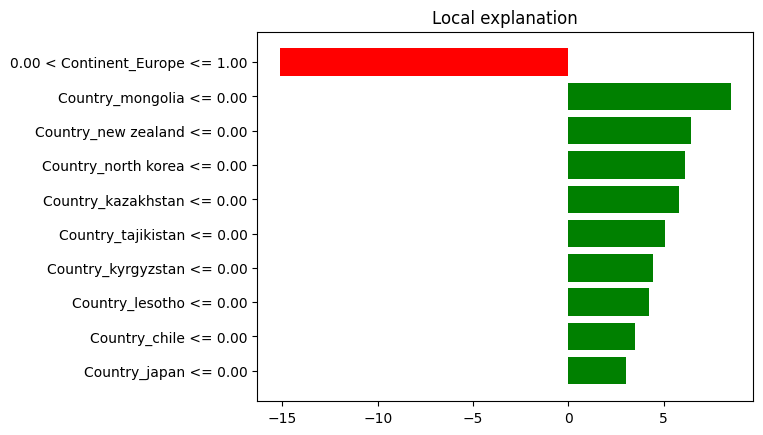

In [48]:
# Plot LIME explanation
exp.as_pyplot_figure()
plt.show()